<a href="https://colab.research.google.com/github/messias93/Challenge-Alura-Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from babel.numbers import format_currency

In [ ]:
# Criando coluna para identificação da loja
loja["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

# Unir todas as lojas
lojas = pd.concat([loja, loja2, loja3, loja4])

# Coluna de faturamento total
lojas["Faturamento"] = lojas["Preço"]

In [ ]:
# Faturamento total
faturamento_total = lojas["Faturamento"].sum()
print("Faturamento Total:", format_currency(faturamento_total, "BRL", locale="pt_BR"))

# Faturamento por loja
faturamento_loja = lojas.groupby("Loja")["Faturamento"].sum().reset_index()
faturamento_loja["Faturamento"] = faturamento_loja["Faturamento"].map(lambda x: format_currency(x, "BRL", locale="pt_BR"))
print("\nFaturamento por Loja:")
print(faturamento_loja)

Faturamento Total: R$ 5.871.490,79

Faturamento por Loja:
     Loja      Faturamento
0  Loja 1  R$ 1.534.509,12
1  Loja 2  R$ 1.488.459,06
2  Loja 3  R$ 1.464.025,03
3  Loja 4  R$ 1.384.497,58


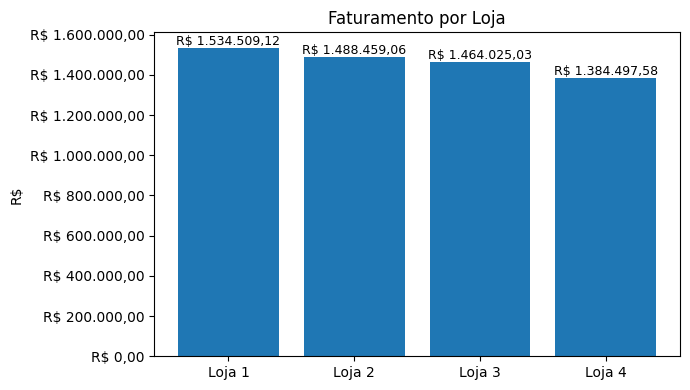

In [ ]:
# Agregando valores
fat_loja_plot = lojas.groupby("Loja", as_index=False)["Faturamento"].sum()
# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(fat_loja_plot["Loja"], fat_loja_plot["Faturamento"])
ax.set_title("Faturamento por Loja")
ax.set_ylabel("R$")

# Eixo Y em R$
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda y, _: format_currency(y, "BRL", locale="pt_BR"))
)

# Rótulos nas barras em R$
for i, v in enumerate(fat_loja_plot["Faturamento"]):
    ax.text(i, v, format_currency(v, "BRL", locale="pt_BR"),
            ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [ ]:
tabela_cat_loja = lojas.pivot_table(
    values="Faturamento",
    index="Categoria do Produto",
    columns="Loja",
    aggfunc="sum",
    fill_value=0
)

#Formatação em R$
try:
    tabela_cat_loja_fmt = tabela_cat_loja.map(
        lambda v: format_currency(float(v), "BRL", locale="pt_BR")
    )
except AttributeError:
    tabela_cat_loja_fmt = tabela_cat_loja.apply(
        lambda col: col.map(lambda v: format_currency(float(v), "BRL", locale="pt_BR"))
    )

print("\nTabela (Categoria x Loja) em R$:")
print(tabela_cat_loja_fmt)


Tabela (Categoria x Loja) em R$:
Loja                          Loja 1         Loja 2         Loja 3  \
Categoria do Produto                                                 
brinquedos              R$ 23.993,78   R$ 21.262,21   R$ 25.869,20   
eletrodomesticos       R$ 484.913,36  R$ 464.758,13  R$ 438.984,89   
eletronicos            R$ 572.659,23  R$ 547.773,71  R$ 547.699,92   
esporte e lazer         R$ 52.387,55   R$ 46.326,09   R$ 47.456,10   
instrumentos musicais  R$ 121.731,69  R$ 139.987,03  R$ 103.174,45   
livros                  R$ 11.713,92   R$ 13.454,35   R$ 12.664,70   
moveis                 R$ 250.178,11  R$ 235.234,68  R$ 268.095,56   
utilidades domesticas   R$ 16.931,48   R$ 19.662,86   R$ 20.080,21   

Loja                          Loja 4  
Categoria do Produto                  
brinquedos              R$ 27.015,67  
eletrodomesticos       R$ 377.680,65  
eletronicos            R$ 545.966,86  
esporte e lazer         R$ 44.465,65  
instrumentos musicais  R$ 100.1

# 3. Média de Avaliação das Lojas

In [ ]:
# Garantir tipo numérico
lojas["Avaliação da compra"] = pd.to_numeric(lojas["Avaliação da compra"], errors="coerce")

# Média por loja
media_avaliacao = (
    lojas.groupby("Loja", as_index=False)
         .agg(Média=("Avaliação da compra", "mean"),
              Qtd_Avaliações=("Avaliação da compra", "size"))
         .sort_values("Média", ascending=False)
)

Média de avaliação por loja:
     Loja  Média  Qtd_Avaliações
2  Loja 3   4.05            2359
1  Loja 2   4.04            2359
3  Loja 4   4.00            2358
0  Loja 1   3.98            2359


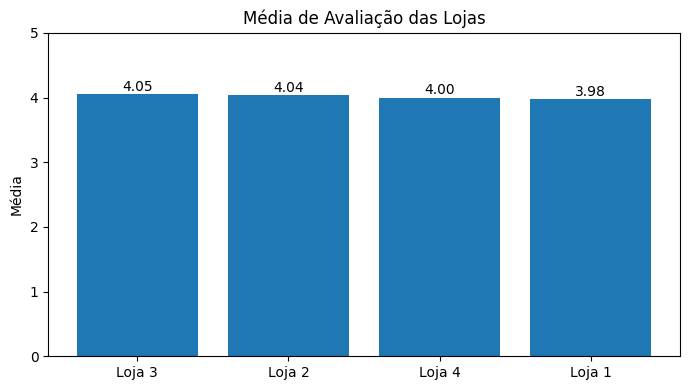

In [ ]:
# Média
media_avaliacao["Média"] = media_avaliacao["Média"].round(2)
print("Média de avaliação por loja:")
print(media_avaliacao)

# Gráfico
plt.figure(figsize=(7,4))
plt.bar(media_avaliacao["Loja"], media_avaliacao["Média"])
plt.ylim(0, 5)  # escala típica de 0 a 5
plt.title("Média de Avaliação das Lojas")
plt.ylabel("Média")
for i, v in enumerate(media_avaliacao["Média"]):
    plt.text(i, v + 0.05, f"{v:.2f}", ha="center")
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
N = 10

# Mais vendidos
mais_vendidos = (
    vendas_por_produto
      .sort_values(["Qtd_Vendas", "Faturamento"], ascending=[False, False])
      .reset_index(drop=True)              # <-- zera o índice
)
mais_vendidos["Posição"] = mais_vendidos.index + 1
mv_disp = mais_vendidos.loc[:N-1, ["Posição","Produto","Qtd_Vendas","Faturamento"]].copy()
mv_disp["Faturamento"] = mv_disp["Faturamento"].map(brl)

print("TOP produtos MAIS vendidos:")
print(mv_disp)

# Menos vendidos
menos_vendidos = (
    vendas_por_produto
      .sort_values(["Qtd_Vendas", "Faturamento"], ascending=[True, True])
      .reset_index(drop=True)
)
menos_vendidos["Posição"] = menos_vendidos.index + 1
mnv_disp = menos_vendidos.loc[:N-1, ["Posição","Produto","Qtd_Vendas","Faturamento"]].copy()
mnv_disp["Faturamento"] = mnv_disp["Faturamento"].map(brl)

print("\nTOP produtos MENOS vendidos:")
print(mnv_disp)



TOP produtos MAIS vendidos:
   Posição                   Produto  Qtd_Vendas    Faturamento
0        1                    Cômoda         210   R$ 77.892,33
1        2               Micro-ondas         206  R$ 154.267,24
2        3  Carrinho controle remoto         206   R$ 19.690,62
3        4                   Bateria         203  R$ 197.074,45
4        5                 Cama king         201  R$ 181.040,36
5        6        Secadora de roupas         200  R$ 280.317,31
6        7           Jogo de panelas         200   R$ 40.675,34
7        8       Modelagem preditiva         200   R$ 16.820,71
8        9                  Cama box         199  R$ 138.797,42
9       10          Blocos de montar         199    R$ 9.069,86

TOP produtos MENOS vendidos:
   Posição                      Produto  Qtd_Vendas    Faturamento
0        1                 Celular ABXY         157  R$ 210.547,77
1        2                      Headset         158   R$ 30.330,90
2        3                      Mochi

# 5. Frete Médio por Loja


Frete Médio por Loja:
     Loja Frete_Médio  Qtd_Pedidos
0  Loja 1    R$ 34,69         2359
1  Loja 2    R$ 33,62         2359
2  Loja 3    R$ 33,07         2359
3  Loja 4    R$ 31,28         2358


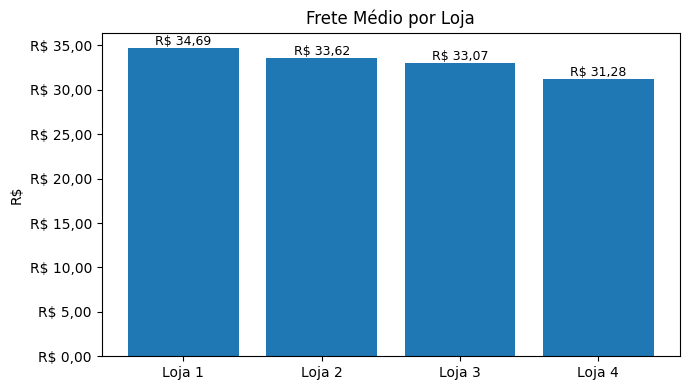

In [ ]:
# Frete meédio por loja
frete_medio_loja = (
    lojas.groupby("Loja", as_index=False)
         .agg(Frete_Médio=("Frete", "mean"),
              Qtd_Pedidos=("Frete", "size"))
         .sort_values("Frete_Médio", ascending=False)
)

frete_medio_loja["Frete_Médio"] = frete_medio_loja["Frete_Médio"].round(2)
frete_medio_display = frete_medio_loja.copy()
frete_medio_display["Frete_Médio"] = frete_medio_display["Frete_Médio"].map(brl)

print("Frete Médio por Loja:")
print(frete_medio_display)

fmt = FuncFormatter(lambda x, pos: brl(x))
plt.figure(figsize=(7,4))
plt.bar(frete_medio_loja["Loja"], frete_medio_loja["Frete_Médio"])
plt.title("Frete Médio por Loja")
plt.ylabel("R$")
plt.gca().yaxis.set_major_formatter(fmt)
for i, v in enumerate(frete_medio_loja["Frete_Médio"]):
    plt.text(i, v, brl(v), ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()
